In [21]:
import pandas as pd
import numpy as np

### 2개의 축을 갖는 그래프 작성
- 남북한 발전량 데이터 셋을 사용 
- 막대그래프는 북한의 발전량을 표시
- 선 그래프는 북한 발전량의 전년 대비 증강률을 백분율로 나타낸다.

In [74]:
df = pd.read_excel("../Data/남북한발전전력량.xlsx")
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [75]:
# 북한 전력량만 출략
df = df.loc[5:9]
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [76]:
# 전력량 컬럼 삭제  
#df.drop("전력량 (억㎾h)", axis=1, inplace=True)
# 완료
df

,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,합계,277,263,247,221,231,230,213,193,170,...,236,255,235,237,211,215,221,216,190,239
6,수력,156,150,142,133,138,142,125,107,102,...,133,141,125,134,132,135,139,130,100,128
7,화력,121,113,105,88,93,88,88,86,68,...,103,114,110,103,79,80,82,86,90,111
8,원자력,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [77]:
# index를 발전 전력별로 변경
df.set_index('발전 전력별', inplace=True)
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
합계,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
수력,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
화력,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111
원자력,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [78]:
df = df.T
df.head()

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-


In [79]:
# 합계 컬럼을 총발전량으로 변경
df = df.rename(columns={"합계":"총발전량"})
df.head()


발전 전력별,총발전량,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-


In [80]:
# 증감률 (변동률) 계산
# 총발전량 - 1년이라는 컬럼 생성
# 전년도 총발전량 가져오기 
df['총발전량 - 1년'] = df['총발전량'].shift(1)  # 한행 전 
df.head()

발전 전력별,총발전량,수력,화력,원자력,총발전량 - 1년
1990,277,156,121,-,NaN
1991,263,150,113,-,277
1992,247,142,105,-,263
1993,221,133,88,-,247
1994,231,138,93,-,221


In [81]:
# 증강율 컬럼 계산 
# 작년도 대비 올해의 증감률 
df['증감률'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1 ) *100
df.head()

발전 전력별,총발전량,수력,화력,원자력,총발전량 - 1년,증감률
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887


In [82]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [83]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

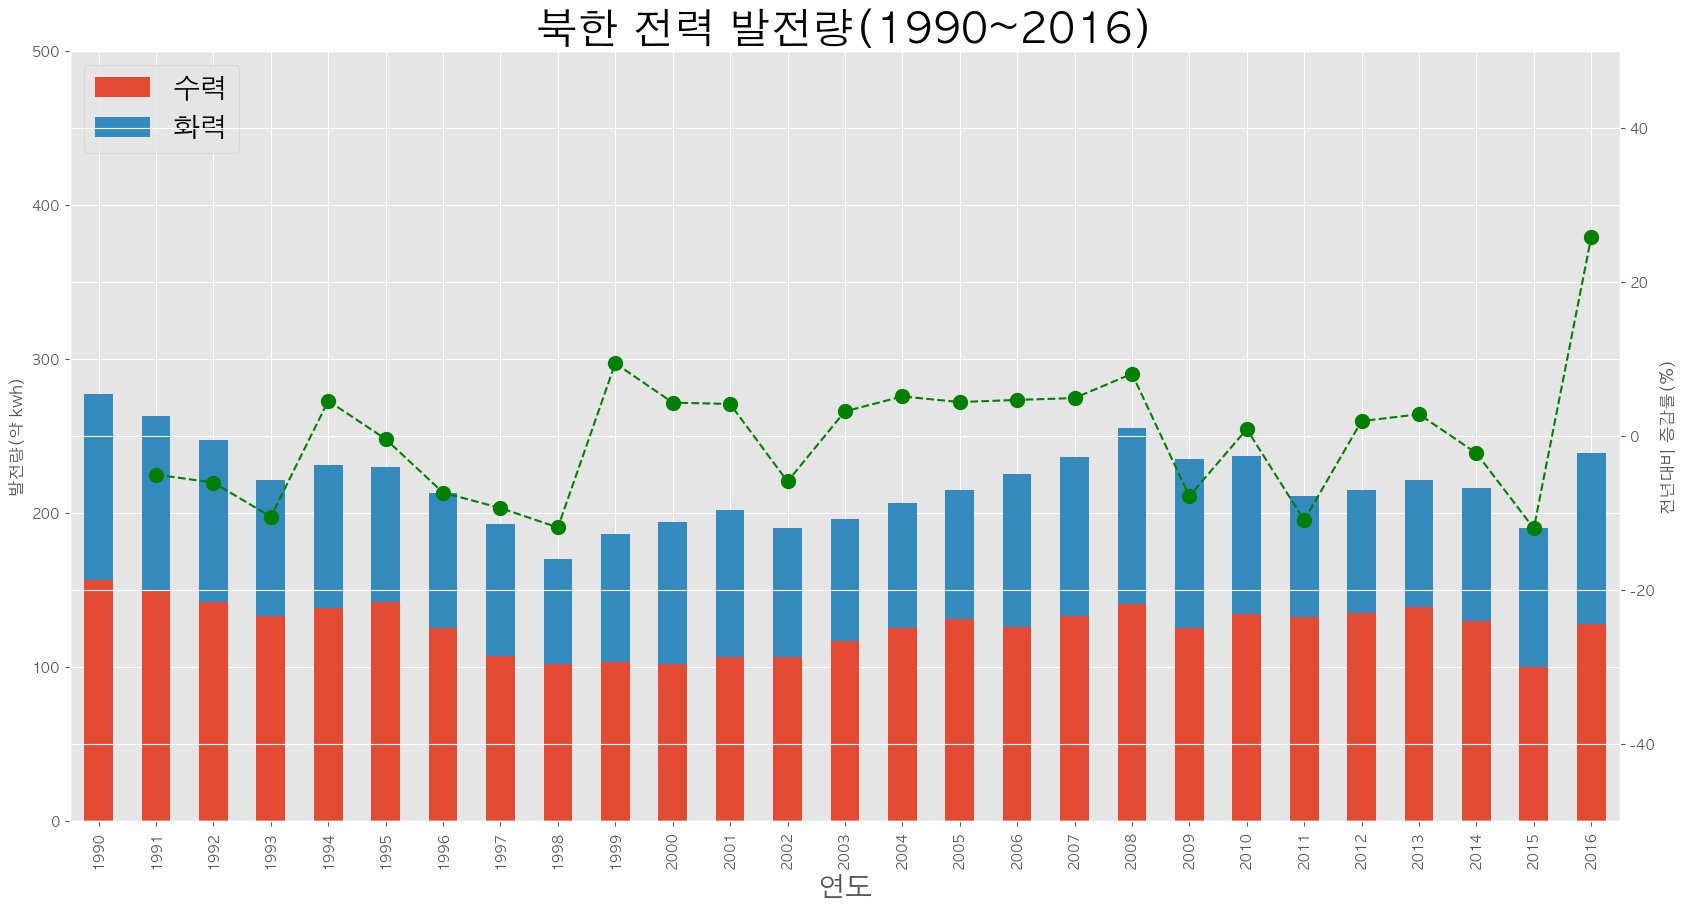

In [84]:
# 2축 그래프 그리기 
plt.style.use("ggplot")
ax1= df[['수력','화력']].plot(kind='bar',figsize=(20,10),stacked=True)
# ax1과 같은 x축이 들어감
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감률, ls='--',marker='o',markersize=10,color='green')
#ylim
ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)
# label
ax1.set_xlabel("연도",size=20)
ax1.set_ylabel("발전량(약 kwh)")
ax2.set_ylabel("전년대비 증감률(%)")

plt.title("북한 전력 발전량(1990~2016)",size=30)
ax1.legend(loc="upper left",fontsize=20)
plt.show()

---
### 히스토그램(histogram)
: 단위별(컬럼별) 데이터의 빈도수를 그래프로 표현 

In [41]:
# Style 서식 지정 
plt.style.use("classic")

In [87]:
df =pd.read_csv("../Data/auto-mpg.csv")
df.head

<bound method NDFrame.head of      18.0  8  307.0  130.0   3504.  12.0  70  1 chevrolet chevelle malibu
0    15.0  8  350.0  165.0  3693.0  11.5  70  1         buick skylark 320
1    18.0  8  318.0  150.0  3436.0  11.0  70  1        plymouth satellite
2    16.0  8  304.0  150.0  3433.0  12.0  70  1             amc rebel sst
3    17.0  8  302.0  140.0  3449.0  10.5  70  1               ford torino
4    15.0  8  429.0  198.0  4341.0  10.0  70  1          ford galaxie 500
..    ... ..    ...    ...     ...   ...  .. ..                       ...
392  27.0  4  140.0  86.00  2790.0  15.6  82  1           ford mustang gl
393  44.0  4   97.0  52.00  2130.0  24.6  82  2                 vw pickup
394  32.0  4  135.0  84.00  2295.0  11.6  82  1             dodge rampage
395  28.0  4  120.0  79.00  2625.0  18.6  82  1               ford ranger
396  31.0  4  119.0  82.00  2720.0  19.4  82  1                chevy s-10

[397 rows x 9 columns]>

In [88]:
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


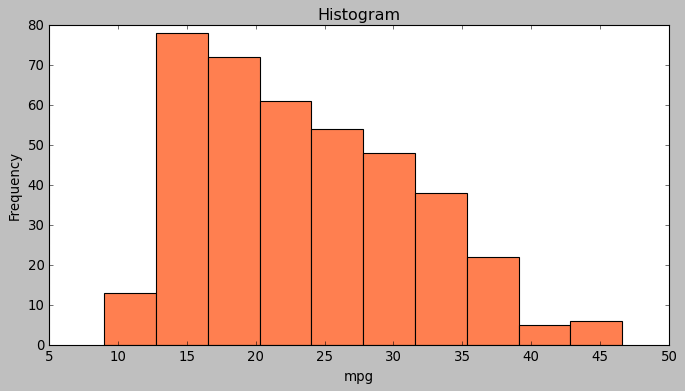

In [47]:
# 연비(mpg) 열에 대한 히스트그램 고르기 
df['mpg'].plot(
            kind = 'hist',
            bins = 10, #단위 (x축의 등분)
            figsize = (10,5),
            color = 'coral'
)
# 그래프 그리기 
plt.title("Histogram")
plt.xlabel("mpg")
plt.show()

> 자동차의 연비값은 대부분 좌측편향이 되어 연비가 낮은 구간에 집중되어 있는 경향을 보인다.

---
### 산점도 (Scatter plot)
- 서로 다른 두 변수 사이의 관계를 나타낸다.



In [50]:
plt.style.use('default')

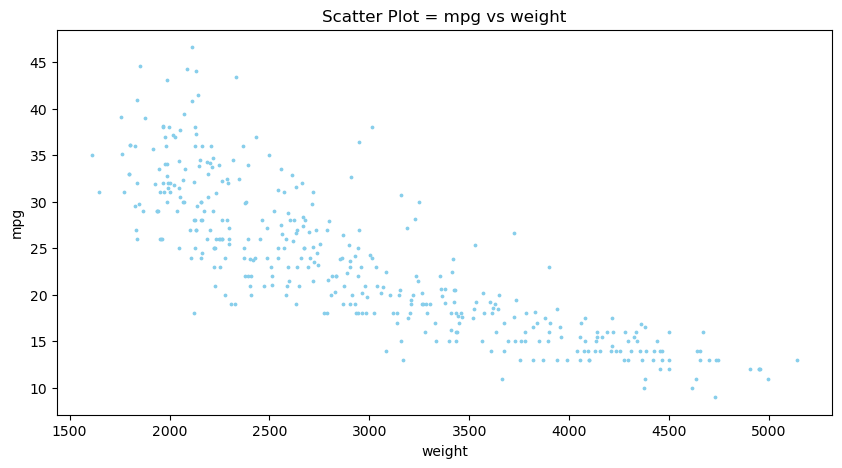

In [56]:
# 연비(mpg)의 차중(weight) 열에 대한 산점도 그리기 
# 전체에 대한 plot 
df.plot(
    kind = 'scatter',
    x ='weight',   # 차중
    y= 'mpg',
    c = 'skyblue',
    s = 3,   # spot 크기 
    figsize = (10,5)
    )
# 그래프 그리기 
plt.title("Scatter Plot = mpg vs weight")
plt.show()

> 자동차의 차중이 커질수록 mpg는 역상괸이 되어 차중이 낮은 구간에 연비가 높은 경향을 보인다

In [57]:
# Cylinder 개수의 상대적 비율의 계산하여 시리즈 생성 
cylinder_size = df.cylinders / df.cylinders.max() * 300  # *300 = hyperparameter
print(cylinder_size)

0      300.0
1      300.0
2      300.0
3      300.0
4      300.0
       ...  
392    150.0
393    150.0
394    150.0
395    150.0
396    150.0
Name: cylinders, Length: 397, dtype: float64


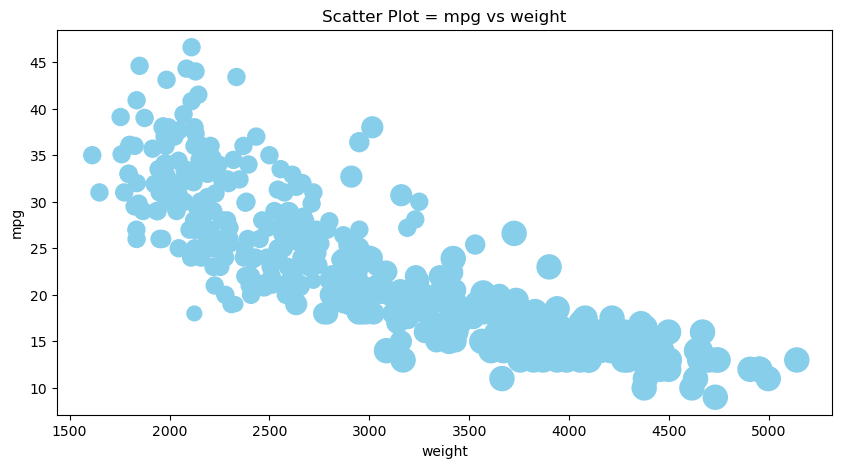

In [58]:
# 연비(mpg)의 차중(weight) 열에 대한 산점도 그리기 
# 전체에 대한 plot 
df.plot(
    kind = 'scatter',
    x ='weight',   # 차중
    y= 'mpg',
    c = 'skyblue',
    s = cylinder_size,   # spot 크기 # 실린더 사이즈별로 크기가 다름 
    # 겹쳐 있는 곳은 잘 안 보임 
    figsize = (10,5)
    )
# 그래프 그리기 
plt.title("Scatter Plot = mpg vs weight")
plt.show()

---
# 버블차트 (Bubble Chart)

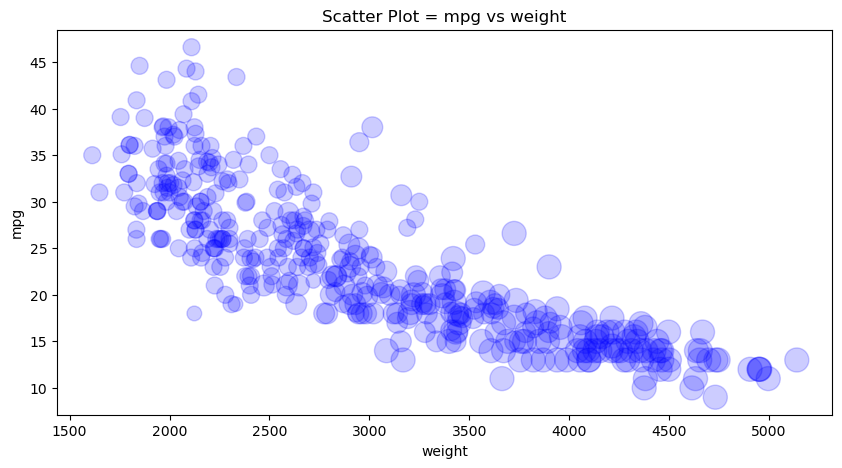

In [62]:
# 연비(mpg)의 차중(weight) 열에 대한 산점도 그리기 
# 전체에 대한 plot 
df.plot(
    kind = 'scatter',
    x ='weight',   # 차중
    y= 'mpg',
    c = 'blue',
    s = cylinder_size,   # spot 크기 # 실린더 사이즈별로 크기가 다름 
    alpha = 0.2,
    figsize = (10,5)
    )
# 그래프 그리기 
plt.title("Scatter Plot = mpg vs weight")
plt.show()

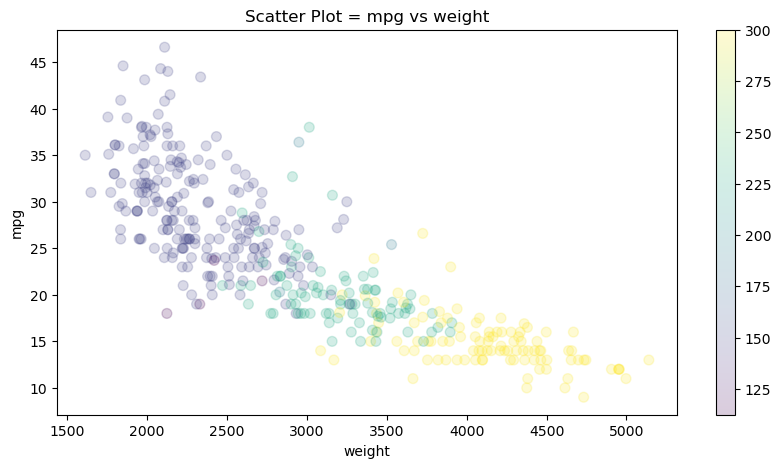

In [70]:
# 연비(mpg)의 차중(weight) 열에 대한 산점도 그리기 
# 전체에 대한 plot 
df.plot(
    kind = 'scatter',
    x ='weight',   # 차중
    y= 'mpg',
    c =  cylinder_size,     # 색구분은 실린더 사이브별로 
    s = 50,   # spot 크기 # 실린더 사이즈별로 크기가 다름 
    alpha = 0.2,
    figsize = (10,5),
    marker = "o",           # 표시방법
    cmap = "viridis",       # color palette
    )
# 그래프 그리기 
plt.title("Scatter Plot = mpg vs weight")
plt.show()

---
### 파이차트 (pie chart)
- 원을 파이처럼 나누어서 표현
- 조각의 크기는 해당변수에 속하는 데이터 값의 크기에 비례(%)

### 자동차의 국가별 데이터 갯수를 파이차트로 표현

In [85]:
plt.style.use("default")

In [89]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


In [90]:
# 국가별 count 계산 
df['count'] = 1
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,count
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500,1


In [120]:
# origin을 기준으로 그룹화 ,합계 연산 
df_origin = df.groupby('origin').sum()
df_origin.head()
# origin을 기준으로 count 완료 

,mpg,cylinders,displacement,weight,acceleration,model year,count
origin,,,,,,,
1,4982.8,1548,60922.5,833617.0,3731.4,18757,248
2,1952.4,291,7640.0,169631.0,1175.1,5307,70
3,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [121]:
# index 값을 변경
df_origin.index = ['USA','EU','JAPAN'] 
df_origin.head()

,mpg,cylinders,displacement,weight,acceleration,model year,count
USA,4982.8,1548,60922.5,833617.0,3731.4,18757,248
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
JAPAN,2405.6,324,8114.0,175477.0,1277.6,6118,79


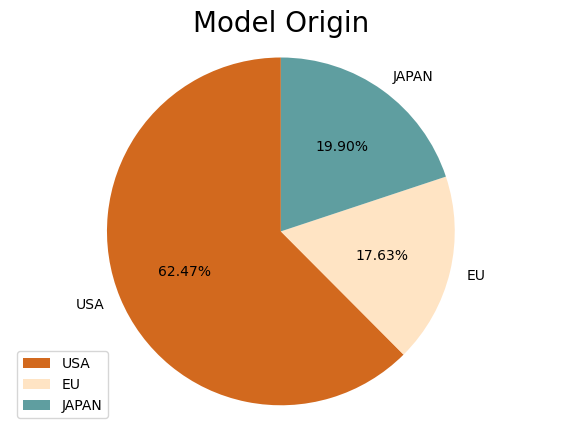

In [122]:
# pie chart 
df_origin['count'].plot(
                    kind = 'pie',
                    figsize = (7,5),
                    autopct = "%.2f%%",
                    startangle = 90,  # 보여주는 각도 시작 
                    colors = ['chocolate','bisque','cadetblue']
)
# 그래프 그리기
plt.title("Model Origin",size = 20)
plt.axis("equal")   #차트 가운데로  균등하게 들어감
plt.legend(labels = df_origin.index, loc="lower left")
# y 축 제목 가리기 
plt.ylabel('')
plt.show()

---
### 박스플롯
- 범주형 데이터의 분포를 파악

# 제조국가별 연비 분포 박스플롯

In [123]:
plt.style.use('seaborn-poster')

In [124]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

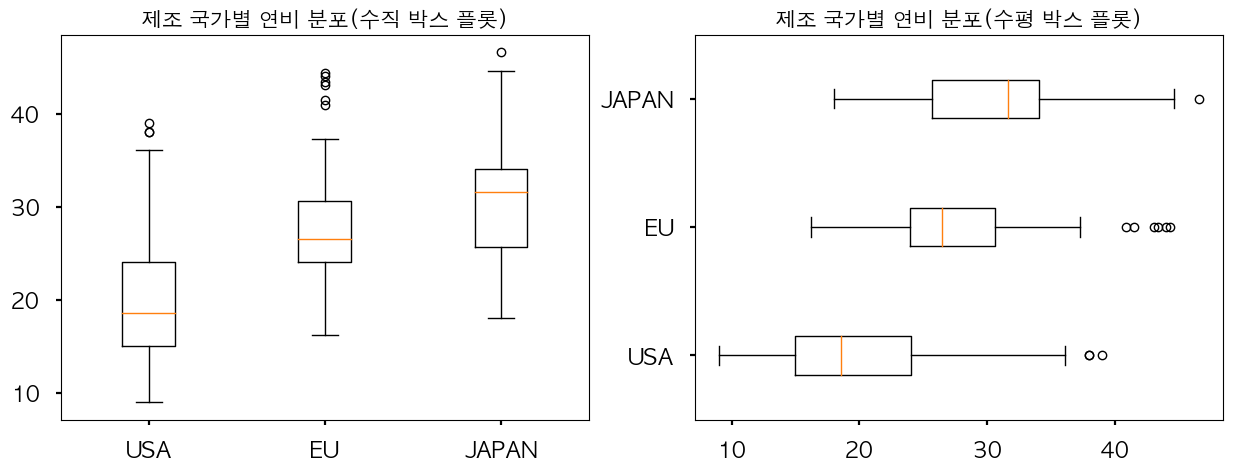

In [133]:
# 그래프 객체 생성
fig = plt.figure(figsize  = (15,5))
ax1 = fig.add_subplot(1, 2,1)  # 1행 2열의 1번째
ax2 = fig.add_subplot(1, 2,2)  # 1행 2열의 2번째

# 수직 박스 플롯
ax1.boxplot(
    x= [   # list 가져오기
        df[df['origin'] == 1]['mpg'],
        df[df['origin'] == 2]['mpg'],
        df[df['origin'] == 3]['mpg'],
    ], 
    labels = df_origin.index
)
# 수평 박스 플롯
ax2.boxplot(
    x= [   # list 가져오기
        df[df['origin'] == 1]['mpg'],
        df[df['origin'] == 2]['mpg'],
        df[df['origin'] == 3]['mpg'],
    ], 
    labels = df_origin.index,
    vert =False     # vertical  =false
)

ax1.set_title("제조 국가별 연비 분포(수직 박스 플롯)",size =15)
ax2.set_title("제조 국가별 연비 분포(수평 박스 플롯)",size =15)   # 원점기준 usa,eu,japan
plt.show()

In [127]:
# df[df['origin'] == 1]['mpg']
# 국가별 mpg 가져오기 

0      15.0
1      18.0
2      16.0
3      17.0
4      15.0
       ... 
391    27.0
392    27.0
394    32.0
395    28.0
396    31.0
Name: mpg, Length: 248, dtype: float64

# 파이썬 그래프 그리기 참고 사이트
- https://www.python-graph-gallery.com/